In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import json

from sklearn.preprocessing import LabelEncoder


import seaborn as sn

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df=pd.read_csv('Tweets.csv')

In [4]:

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
df['tweet_created']=pd.to_datetime(df['tweet_created'])

In [7]:
df['time_stamp']=pd.to_datetime(df['tweet_created'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype                                 
---  ------                        --------------  -----                                 
 0   tweet_id                      14640 non-null  int64                                 
 1   airline_sentiment             14640 non-null  object                                
 2   airline_sentiment_confidence  14640 non-null  float64                               
 3   negativereason                9178 non-null   object                                
 4   negativereason_confidence     10522 non-null  float64                               
 5   airline                       14640 non-null  object                                
 6   airline_sentiment_gold        40 non-null     object                                
 7   name                          14640 non-null  object                        

In [27]:
df1=df.drop(["tweet_id","airline_sentiment","airline_sentiment_confidence","negativereason","negativereason_confidence","negativereason_gold","airline","airline_sentiment_gold","tweet_coord","tweet_location","user_timezone"], axis='columns')
df1.head(20)

,name,retweet_count,text,tweet_created,time_stamp
0,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,2015-02-24 11:35:52-08:00
1,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,2015-02-24 11:15:59-08:00
2,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,2015-02-24 11:15:48-08:00
3,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,2015-02-24 11:15:36-08:00
4,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,2015-02-24 11:14:45-08:00
5,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33-08:00,2015-02-24 11:14:33-08:00
6,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57-08:00,2015-02-24 11:13:57-08:00
7,pilot,0,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29-08:00,2015-02-24 11:12:29-08:00
8,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19-08:00,2015-02-24 11:11:19-08:00
9,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24 10:53:27-08:00,2015-02-24 10:53:27-08:00


In [19]:
df1.shape

(14640, 5)

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype                                 
---  ------         --------------  -----                                 
 0   name           14640 non-null  object                                
 1   retweet_count  14640 non-null  int64                                 
 2   text           14640 non-null  object                                
 3   tweet_created  14640 non-null  datetime64[ns, pytz.FixedOffset(-480)]
 4   time_stamp     14640 non-null  datetime64[ns, pytz.FixedOffset(-480)]
dtypes: datetime64[ns, pytz.FixedOffset(-480)](2), int64(1), object(2)
memory usage: 572.0+ KB


In [22]:
df1.tail(5)

,name,retweet_count,text,tweet_created,time_stamp
14635,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01-08:00,2015-02-22 12:01:01-08:00
14636,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46-08:00,2015-02-22 11:59:46-08:00
14637,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15-08:00,2015-02-22 11:59:15-08:00
14638,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02-08:00,2015-02-22 11:59:02-08:00
14639,daviddtwu,0,@AmericanAir we have 8 ppl so we need 2 know h...,2015-02-22 11:58:51-08:00,2015-02-22 11:58:51-08:00


In [23]:
df1['Timestamp'] = pd.to_datetime(df1['time_stamp'])
df1['Year'] = df1.Timestamp.apply(lambda x: x.year)
df1['Month'] = df1.Timestamp.apply(lambda x: x.month)
df1['Day'] = df1.Timestamp.apply(lambda x: x.day)
df1['Hour'] = df1.Timestamp.apply(lambda x: x.hour)
df1['Weekday'] = df1.Timestamp.apply(lambda x: x.weekday())

In [24]:
df1.head()

,name,retweet_count,text,tweet_created,time_stamp,Timestamp,Year,Month,Day,Hour,Weekday
0,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,2015-02-24 11:35:52-08:00,2015-02-24 11:35:52-08:00,2015,2,24,11,1
1,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,2015-02-24 11:15:59-08:00,2015-02-24 11:15:59-08:00,2015,2,24,11,1
2,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,2015-02-24 11:15:48-08:00,2015-02-24 11:15:48-08:00,2015,2,24,11,1
3,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,2015-02-24 11:15:36-08:00,2015-02-24 11:15:36-08:00,2015,2,24,11,1
4,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,2015-02-24 11:14:45-08:00,2015-02-24 11:14:45-08:00,2015,2,24,11,1


In [25]:
#переменная, отвечающая за число дней, прошедших с момента добавления твита на сайт
df1['days_from_creation'] = (df1.Timestamp.max() - df1.Timestamp)/np.timedelta64(1, 'D')

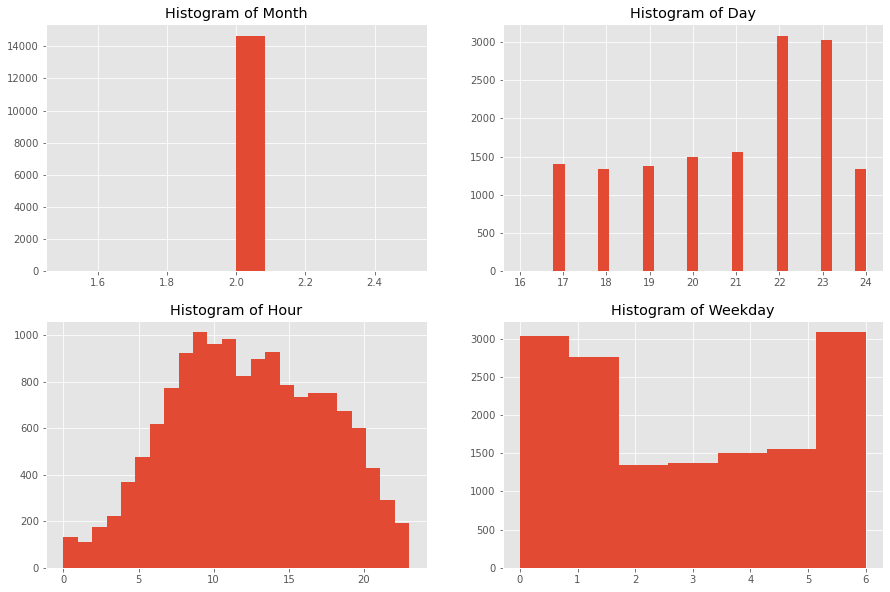

In [26]:
index =0 
f, axarr = plt.subplots(2, 2, figsize=(15,10))
times = ['Month', 'Day', 'Hour', 'Weekday']
bins = [12, 31, 24, 7]
index = 0
for i in range(2):
    for j in range(2):
        axarr[i, j].hist(df1[times[index]], bins = bins[index])
        axarr[i, j].set_title('Histogram of {}'.format(times[index]))
        index += 1

f.subplots_adjust(hspace=0.2)

In [28]:
#кажется, подобраны твиты за один месяц, большая часть написана 22 и 23 числа ближе к 10 часам

In [35]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yanov\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [41]:
stop = stopwords.words('english')
stemmer = nltk.stem.snowball.EnglishStemmer('english')

def data_Stemmer(text):
    return ' '.join([stemmer.stem(word) for word in text.split(' ') if word not in stop])

In [44]:
df1.head(10)

,name,retweet_count,text,tweet_created,time_stamp
0,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,2015-02-24 11:35:52-08:00
1,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,2015-02-24 11:15:59-08:00
2,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,2015-02-24 11:15:48-08:00
3,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,2015-02-24 11:15:36-08:00
4,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,2015-02-24 11:14:45-08:00
5,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33-08:00,2015-02-24 11:14:33-08:00
6,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57-08:00,2015-02-24 11:13:57-08:00
7,pilot,0,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29-08:00,2015-02-24 11:12:29-08:00
8,dhepburn,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19-08:00,2015-02-24 11:11:19-08:00
9,YupitsTate,0,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24 10:53:27-08:00,2015-02-24 10:53:27-08:00


In [45]:
df1.target

AttributeError: 'DataFrame' object has no attribute 'target'

In [40]:
df1.description = df1.description.apply(lambda x: data_Stemmer(x))

AttributeError: 'DataFrame' object has no attribute 'description'